In [57]:
'''やること
sklearnで決定木分析をする
'''

'''目次
1.必要なモジュールとデータセットの準備
2.データセットの確認
3.ハイパーパラメータの調整(モデル作成と精度確認)
4.可視化
5.各特徴量の重要度を可視化
'''

In [ ]:
# 1.必要なモジュールとデータセット
from sklearn.datasets import load_iris
iris = load_iris()


In [59]:
# 2.データセットの確認
print(type(iris)) # データ型の確認
print(iris.data.shape) # サンプルサイズ、説明変数の次元数の確認
print(iris.target) #目的変数を確認

'''モデル作成と検証用にデータを分割(チュートリアルには記載なし)
sklearnのtrain_test_splitについて
トレーニング用データ、テスト用データを3:1に分割する。
データをシャッフルしてそこからデータを分割する。（擬似乱数を用いてシャッフル）
この時、random_stateを指定すると、「再度同じ処理を実行した際に同じデータを取得」することができる。
'''

# 目的変数を確認した結果、データが偏っているのでランダムにシャッフルした上で、トレーニング用データと検証用データに分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target,random_state=10)


<class 'sklearn.utils.Bunch'>
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [130]:
'''3.ハイパーパラメータの調整(モデル作成と精度確認)
木の深さと、終端ノード数でパラメータチューニング
'''
# モジュールのインポート
from sklearn import tree
from sklearn.grid_search import GridSearchCV

## パラメータ
tuned_parameters = {'max_depth':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], # 木の深さを1-10で
                    'max_leaf_nodes':  [2,4,6,8,10] # 最大終端ノード数を2,4,6,8,10で
                   }

# 上記で用意したパラメーターごとに交差検証を実施。最適な木の深さを確認する。
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0,splitter='best'), tuned_parameters, scoring="accuracy",cv=5, n_jobs=-1)
clf = clf.fit(X_train, y_train) # モデル作成!
print("Best Parameter: {}".format(clf.best_params_))
print("Best Parameterでの検証用データの精度: {:.2f}".format(clf.score(X_test, y_test)))
print("Best Parameterで交差検証した精度の平均（訓練データ）: {:.2f}".format(clf.best_score_))

Best Parameter: {'max_depth': 4, 'max_leaf_nodes': 6}
Best Parameterでの検証用データの精度: 1.00
Best Parameterで交差検証した精度の平均（訓練データ）: 0.93


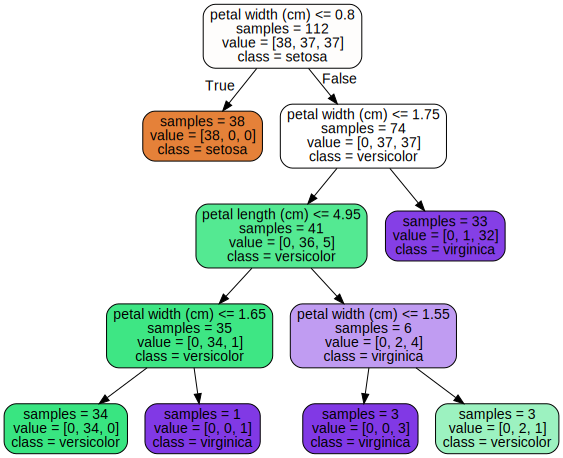

In [127]:
'''4.可視化
分析結果をファイルにして出力した後、そのファイルを読み込んで可視化します。
ターミナルで「pip install graphviz」を実行して、graphvizをインストールする必要があります。
'''

# パラメータ調整の結果、もっとも精度がよかった木の深さを採用 
clf = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=0)
clf = clf.fit(X_train,y_train)

# tree.dotという名前で分析結果を出力
tree.export_graphviz(clf, out_file="tree.dot",
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True, impurity=False)


# tree.dotファイルを可視化
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

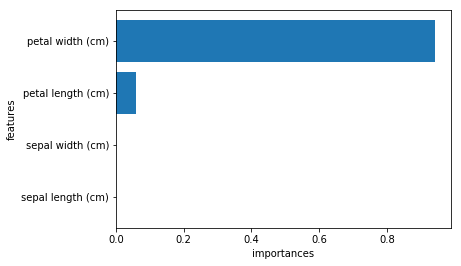

'\n特徴量の重要度から言えることは、「重要度の高い特徴量は、データを分割するのに有用である」ということだけで、「重要度が低い特徴量は不要」という訳ではない。\nなぜなら、偶然別の特徴量に同じ情報が含まれてしまっているケースもあるからだ。\n'

In [128]:
'''5.各特徴量の重要度を可視化
'''
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model):
    n_features = iris.data.shape[1] # 全説明変数
    plt.barh(range(n_features), model.feature_importances_, align='center') # 描画する際の枠組みを設定
    plt.yticks(np.arange(n_features), iris.feature_names) # 縦軸の設定
    plt.xlabel('importances') # 横軸の設定
    plt.ylabel('features') # 縦軸の設定
    plt.show()

# 実行
plot_feature_importances(clf)

'''
特徴量の重要度から言えることは、「重要度の高い特徴量は、データを分割するのに有用である」ということだけで、「重要度が低い特徴量は不要」という訳ではない。
なぜなら、偶然別の特徴量に同じ情報が含まれてしまっているケースもあるからだ。
'''

Best Parameter: {'max_depth': 4, 'max_leaf_nodes': 6}
ベストなパラメータでの検証用データの精度: 1.00
ベストなパラメータで交差検証した精度の平均（訓練データ）: 0.93
